# Projet numérique : câble sous-marin

## Questions théoriques

1) La loi des grands nombres permet, pour un nombre suffisamment important de simulations conditionnelles, d'estimer l'espérance conditionnelle comme la moyenne empirique de simulations conditionnelles.

2) On note $U$ le vecteur des composantes de $Z$ correspondant aux points de discrétisation sans observation, $V$ celui correspondant aux points de discrétisation avec observation. 
La loi conditionnelle de U sachant $V=v$ est définie par la densité conditionnelle suivante : 
$f_{U|V = v}(u) = \frac{1}{(2\pi)^{n/2}\sqrt{\det(CS_{U})}}\exp(-\frac{1}{2}(u - m_{U|V=v}){}^tCS_{U}^{-1}(u-m_{U|V=v})$.
En effet, le vecteur des profondeurs $Z$ est gaussien à densité et (au réordonnement des indices près) est tel que $Z = (Z_{1},\ldots,Z_{N})$ avec $U = (Z_1 ,\ldots,Z_{N-n+1}$ et $V = (Z_{N-n},\ldots,Z_N)$.
$CS_{U}$ désigne le complément de Schur du bloc $C_U$ de la matrice de covariance $C$ de $Z$ définie par blocs : $\begin{pmatrix} C_U&C_{U,V} \\ C_{V,U}&C_{V} \end{pmatrix}$ où $C_U = Cov(U,U)$, $C_Z = Cov(V,V)$ et $C_{U,V} = Cov(U,V)$.
On a donc $CS_U = C_U - C_{U,V}C_{V}^{-1}C_{V,U}$.
$m_{U|V=v} = m_U + C_{U,V}C_{V}^{-1}(v-m_V)$ est l'espérance conditionnelle de $U$ sachant $V$ ;  et CS_U est la covariance conditionnelle de $U$ sachant $V$.

3) Si $Y = (Y_1,\ldots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, alors le vecteur $Z=m+RY$ (où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$) est gaussien d'espérance $m$ et de matrice de covariance $RR^{t}$.

4) Algorithme de simulation conditionnelle :
Calcul de la matrice de covariance du vecteur des profondeurs $Z$, grâce à la fonction $C$.
On extrait de cette matrice les blocs $C_U$, $C_{U,V}$, $C_{V,U}$,$C_V$ (on tient compte des indices des points d'observation).
Calcul de l'espérance conditionnelle $m$ de $U$ sachant $V$, grâce aux blocs extraits à l'étape précédente.
Calcul de la covariance conditionnelle $CS_U$. Comme la matrice de covariance $C$ du vecteur des profondeurs $Z$ est définie positive, $CS_U$ est aussi définie positive, on peut donc écrire sa décomposition de Cholesky $CS_U = RR^{t}$.
Simulation d'un vecteur gaussien $Y$ de $k$ variables indépendantes d'espérance nulle et de variance 1 (où $k$ est le nombre de points de discrétisation sans observation).
Calcul de $U = m + RY$.
On ainsi effectué une simulation conditionnelle de $U$ sachant $V = v$.

## Données

In [1]:
import numpy as np
from math import*
import matplotlib.pyplot as plt

In [2]:
# Discrétisation

A = 0
B = 500
N = 101  #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = Delta * discretization_indexes

# Paramètres du modèle

a = 50
sigma_2 = 12
mu = -5

# Données

observation_indexes = [k for k in range(0, N, 20)]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

# Indices des composants correspondants aux observations et aux composantes non observ&es

unknown_indexes = list(set(discretization_indexes) - set(observation_indexes))

## Questions

### Covariance

In [3]:
def covariance(a, sigma2, h) :
    return sigma2 * np.exp(-np.abs(h)/a)

X = np.linspace(A, B, N)
distance = np.array([[X[i] - X[j] for j in range(N)] for i in range(N)])
print(f"distances : {distance}")

Sigma = covariance(a, sigma_2, distance)
print(f"matrice de covariance : {Sigma}")

distances : [[   0.   -5.  -10. ... -490. -495. -500.]
 [   5.    0.   -5. ... -485. -490. -495.]
 [  10.    5.    0. ... -480. -485. -490.]
 ...
 [ 490.  485.  480. ...    0.   -5.  -10.]
 [ 495.  490.  485. ...    5.    0.   -5.]
 [ 500.  495.  490. ...   10.    5.    0.]]
matrice de covariance : [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


### Extraction

In [4]:
cov_obs, cov_inc, cov_inc_obs, cov_obs_inc = [], [], [], []

for i, L in enumerate(Sigma) :
    for j, c in enumerate(L) :
        if i in observation_indexes and j in observation_indexes :
            cov_obs.append(c)
        elif i in unknown_indexes and j in unknown_indexes :
            cov_inc.append(c)
        elif i in unknown_indexes and j in observation_indexes :
            cov_inc_obs.append(c)
        else :
            cov_obs_inc.append(c)

k = len(unknown_indexes)
cov_obs = np.array(cov_obs).reshape(6, 6)  # correspond à C_v dan sl partie théorique
cov_inc = np.array(cov_inc).reshape(k, k) #C_u dans la partie théorique
cov_inc_obs = np.array(cov_inc_obs).reshape(k, 6) #C_u,v dans la partie théorique
cov_obs_inc = np.array(cov_obs_inc).reshape(6, k) #C_v,u dans la partie théorique

print(f" matrice de covariance entre les observations : {cov_obs}")
print (f" matrice de covariance entre les inconnues : {cov_inc}")
print(f" matrice de covariance entre les observations et les inconnues : {cov_obs_inc}")
print(f" matrice de covariance entre les inconnues et les observations : {cov_inc_obs}")

 matrice de covariance entre les observations : [[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]]
 matrice de covariance entre les inconnues : [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 8.98221959e-04
  8.12744838e-04 7.35401941e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 9.92688787e-04
  8.98221959e-04 8.12744838e-04]
 ...
 [8.12744838e-04 8.98221959e-04 9.

### Espérance conditionnelle

In [5]:
esp_cond = mu*np.ones(k) + np.dot(np.dot(cov_inc_obs, np.linalg.inv(cov_obs)), depth - mu*np.ones(6)) #calcul de l'espérance conditionnelle des composantes non observées sachant les observations
print (f"espérance conditionnelle = {esp_cond} ")

espérance conditionnelle = [ -0.46688335  -0.88839774  -1.26876184  -1.61178245  -1.92089264
  -2.19918609  -2.44944805  -2.67418323  -2.87564085  -3.05583718
  -3.21657567  -3.35946505  -3.4859354   -3.59725249  -3.69453041
  -3.77874275  -3.85073233  -3.91121966  -3.96081011  -4.31432093
  -4.62177936  -4.92545243  -5.2283794   -5.53359206  -5.8441451
  -6.16314662  -6.49378931  -6.83938234  -7.20338453  -7.58943893
  -8.00140931  -8.4434188   -8.91989118  -9.43559515  -9.99569205
 -10.60578751 -11.27198758 -12.00095981 -11.91810571 -11.10545015
 -10.35389999  -9.65593346  -9.00456508  -8.39327573  -7.81594742
  -7.26680206  -6.74034362  -6.23130312  -5.73458592  -5.2452207
  -4.75830973  -4.26897984  -3.77233366  -3.26340058  -2.73708703
  -2.18812549  -1.61102176  -1.43702815  -1.83839689  -2.20812324
  -2.54990754  -2.8671705   -3.16308739  -3.44061983  -3.70254547
  -3.95148576  -4.18993216  -4.42027113  -4.64480797  -4.86578994
  -5.08542869  -5.30592243  -5.52947795  -5.7583326

#### Tracé de l'espérance conditionnelle en fonction des données

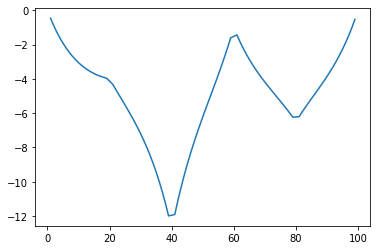

In [6]:
plt.plot(unknown_indexes, esp_cond)

### Variance conditionnelle

In [7]:
cov_cond = cov_inc - np.dot(np.dot(cov_inc_obs, np.linalg.inv(cov_obs)), cov_obs_inc) # problème rencontré : cette matrice n'est pas symétrique, après vérification, cela est sûrement dû à une erreur d'arrondi. Idée : corriger cette erreur (cf ci-dessous)
cov_cond = (1/2)*(cov_cond + np.transpose(cov_cond))
var_cond = np.diag(cov_cond)

print(f"matrice de covariance conditionnelle = {cov_cond}")
print(f"variance conditionnelle = {var_cond}")

matrice de covariance conditionnelle = [[ 2.16624554e+00  1.95016959e+00  1.75361159e+00 ...  1.62630326e-19
   9.21571847e-19  0.00000000e+00]
 [ 1.95016959e+00  3.91985713e+00  3.52477392e+00 ... -1.08420217e-19
   8.13151629e-19  9.21571847e-19]
 [ 1.75361159e+00  3.52477392e+00  5.33121337e+00 ... -8.67361738e-19
  -1.62630326e-19  1.08420217e-19]
 ...
 [ 1.62630326e-19 -1.08420217e-19 -8.67361738e-19 ...  5.33121337e+00
   3.52477392e+00  1.75361159e+00]
 [ 9.21571847e-19  8.13151629e-19 -1.62630326e-19 ...  3.52477392e+00
   3.91985713e+00  1.95016959e+00]
 [ 0.00000000e+00  9.21571847e-19  1.08420217e-19 ...  1.75361159e+00
   1.95016959e+00  2.16624554e+00]]
variance conditionnelle = [2.16624554 3.91985713 5.33121337 6.45695694 7.34226788 8.02267682
 8.52549097 8.87089003 9.07273607 9.13912987 9.07273607 8.87089003
 8.52549097 8.02267682 7.34226788 6.45695694 5.33121337 3.91985713
 2.16624554 2.16624554 3.91985713 5.33121337 6.45695694 7.34226788
 8.02267682 8.52549097 8.870890

### Tracé de la variance conditionnelle en fonction de la position

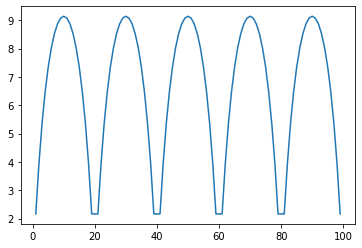

In [8]:
plt.plot(unknown_indexes, var_cond)

La variance conditionnelle est d'autant plus élevée qu'on s'éloigne des positions où la profondeur est connue. En ces points d'observation, la variance doit être nulle : les profondeurs connues $(Z(x_{j_1}), \ldots, Z(x_{j_n}))$ où ${j_1, \ldots, j_n} =$ sont les indices des positions d'observation sont des variables alétoires presque sûrement constantes.

### Simulation conditionnelle

On applique l'algorithme décrit dans la question n°4 de la partie théorique.

In [9]:
Y=np.random.normal(0,1,95) #simule un vesteur gaussien de même taille k que unknown_indexes,ave k variables aléatoires indépendantes suivant une loi normale centrée réduite 

depth_inc = esp_cond + np.dot(np.linalg.cholesky(cov_cond), Y) #simulation conditionnelle du vecteur des profondeurs inconnues, en suivant le calcul décrit dans la question théorique numéro 3
depth_tot = list(depth_inc)
for i in observation_indexes : #le but de cette boucle est de compléter le vecteur des profondeurs inconnues en y insérant aux bonnes positions les profondeurs connues
    depth_tot = depth_tot[:i] + [depth[i//20]] + depth_tot[i:]

Z = np.array(depth_tot) # ainsi, Z est le vecteur des profondeurs (connues et simulées) : on a la profondeur pour tous les points indexés

print(f"vecteur des profondeurs : {Z}")

vecteur des profondeurs : [  0.          -1.47452935  -1.59344104   0.93509022  -1.23385655
  -5.09875384  -7.38432447  -7.70723686  -8.6617301   -7.41101939
  -7.24853332  -8.31064533  -6.53215029  -9.18145505  -5.65166575
  -6.75926144  -6.85374762  -5.59005176  -3.55798237  -4.38073154
  -4.          -2.62001349  -4.32808614  -2.73741162  -5.45929371
  -7.03068656  -6.61709773  -8.13342978  -8.56054375  -8.01494364
 -10.28528524 -11.45812683 -13.58859939 -12.64835446  -8.8472059
 -12.73490466 -12.15839569 -11.58490822 -10.5322278  -11.3493092
 -12.8        -12.9928465  -12.43968274 -10.20297928  -8.23712066
  -7.99799137  -6.65842733  -5.26995248  -2.84750138  -2.64339444
  -6.69851794  -8.20670755  -8.13829769  -6.9404297   -6.55967195
  -6.00289414  -4.52121925  -4.63852427  -3.38648328  -2.76007073
  -1.          -2.04305044  -0.54711295  -0.26506605   0.52414994
   2.0569128   -1.84081485  -0.462417     0.6036602   -0.10823507
  -0.41696818  -3.16377185   0.20340438  -1.80378715

#### Tracé de la simulation conditionnelle et de l'espérance conditionnelle

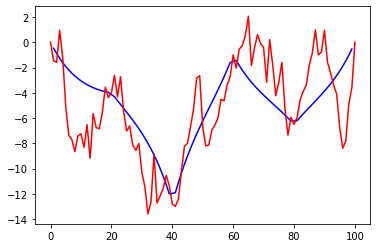

In [10]:
plt.plot(unknown_indexes, esp_cond, color = 'b') #espérance conditionnelle en bleu
plt.plot(np.linspace(0,100,101), Z, color = 'r') #simulation en rouge

On remarque que la simulation "suit" l'espérance conditionnelle : les valeurs obtenues restent groupées autour de l'espérance conditionnelle. La valeur prise en un point x par l'espérance conditionnelle est en effet la plus probable : cela est dû au fait qu'on simule ici un vecteur gaussien.

### Fonction qui calcule la longueur du cable en fonction d'une liste et d'un pas passés en argument

In [11]:
def longueur_cable(profondeurs,pas):
    """fonction qui à partir de la donnée des profondeurs de tous les points de la discrétisation renvoie la longueur du 
    cable associée"""
    
    return sum([np.sqrt(pas**2 + (profondeurs[i] - profondeurs[i-1])**2) for i in range (1, len(profondeurs))])


Ici, on suppose bien sû qu'il y a plus de 2 points dans la liste passée en argument, ce qui est évidemment réalisé.

### Réalisation de 100 simulations

In [15]:
def longueur_cable_simulation(n, pas):
    """fonction qui prend en argument un pas pas et un entier n et renvoie une estimation de la longueur du cable calculée à
    partir d'une moyenne calculée sur  n simulations réalisées avec le pas passé en argument"""
    moyenne = 0
    for i in range (n):
        Y=np.random.normal(0,1,95) 
        depth_inc = esp_cond + np.dot(np.linalg.cholesky(cov_cond), Y) 
        depth_tot = list(depth_inc)
        for i in observation_indexes : 
            depth_tot = depth_tot[:i] + [depth[i//20]] + depth_tot[i:]
        Z = np.array(depth_tot) 
        moyenne += 1/n*longueur_cable(Z, pas)
    return moyenne

In [16]:
longueur_cable_simulation(100, Delta) #espérance conditionnelle de la longueur

522.684457856499

In [18]:
esp_cond_tot = list(esp_cond) #espérance conditionnelle du vecteur des profondeurs inconnues à laquelle on a ajouté les proofndeurs connues
for i in observation_indexes :
    esp_cond_tot = esp_cond_tot[:i] + [mu] + esp_cond_tot[i:]

esp_cond_tot = np.array(esp_cond_tot)
long_esp_cond = longueur_cable(esp_cond_tot, Delta)
print (f"longueur de l'espérance conditionnelle = {long_esp_cond}")

longueur de l'espérance conditionnelle = 514.5958822709576


La longueur de l'espérance conditionnelle semble légèrement inférieure à l'espérance conditionnelle de la longueur (environ 5 à 10 mètres plus courte).

Cela est peut-être dû au fait que lorsqu'on regarde le graphe de l'espérance conditionnelle en fonction de la position, celui-ci est assez "lisse"; il y peu de grosse variations locales (contraiarement aux résultats simulés numériquement) : cela donne donc une longueur de câble plus petite.

### Tracé de la suite des Mn

In [19]:
def trace_Mn(p,pas):
    """fonction qui prend en argument un entier p et un pas âs et représente sur un graphique la suite des moyennes des 
    longueurs de câbles pour les puissances de 10 comprises entre 0 et p et leurs multiples, calculées en fonction du pas de discrétisation"""
    X= [k*10**i for i in range (1,p+1) for k in range (1,9)]
    Y= [longueur_cable_simulation(x,pas) for x in X]
    plt.clf()
    plt.plot(X,Y)
    plt.show()

Ici, on a choisi de ne représenter la suite des Mn que pour les puissances de 10 car c'est le comportement asymptotique de la suite qui nous intéresse.
On peut exécuter la fonction pour p = 3 par exemple

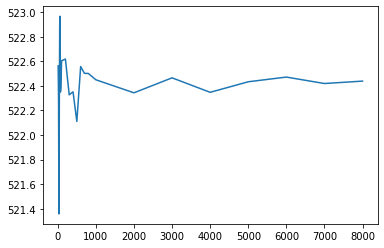

In [20]:
trace_Mn(3, Delta)

Pour une valeur de p relativement faible, le tracé prend un certain temps (de l'ordre de 1minute) donc nous n'allons pas l'exécuter pour des valeurs plus élevées (10 ou 20 par exemple). Cependant, on peut supposer en toute logique que la suite des Mn converge, vers la valeur du cable la plus probable pour le modèle choisi.

On remarque que cette suite semble tendre vers une valeur proche de 522,4 mètres (soit 6 mètres de plus que la longueur de l'espérance conditionnelle) : cette longueur vers laquelle on tend est en fait la véritable espérance conditionnelle de la longueur (voir question théorique n°1 : loi des grands nombres).

### Tracé de l'histogramme

In [93]:
def histogramme(n,pas):
    """fonction qui prend en argument un entier n et un pas pas et qui trace l'histogramme des valeurs obtenues"""
    L=[]
    for i in range (n):
        Y=np.random.normal(0,1,95) 
        depth_inc = esp_cond + np.dot(np.linalg.cholesky(cov_cond), Y)  
        depth_tot = list(depth_inc)
        for i in observation_indexes : 
            depth_tot = depth_tot[:i] + [depth[i//20]] + depth_tot[i:]
        Z = np.array(depth_tot)
        L.append(longueur_cable(Z, pas))
    m=min(L)
    M=max(L)
    X=np.linspace(m,M,20)
    plt.clf()
    plt.hist(L,X)

Ici, on peut exécuter la fonction pour n = 100 mais il sera intéressant de le faire pour des plus grandes valeurs de n en question 14

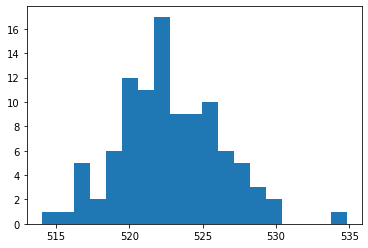

In [94]:
histogramme(100, Delta)

On peut envisager 2 méthodes de calcul d'un intervalle de confiance à 95%. La première est naîve et imprécise et repose sur le calcul de l'aire des rectangles qui constituent l'histogramme. La seconde fait appel au théorème centrale limite et est un peu coûteuse en terme de calculs.

In [95]:
def intervalle_de_confiance1(n, pas):
    L=[]
    for i in range (n):
        Y=np.random.normal(0,1,95) 
        depth_inc = esp_cond + np.dot(np.linalg.cholesky(cov_cond), Y)  
        depth_tot = list(depth_inc)
        for i in observation_indexes : 
            depth_tot = depth_tot[:i] + [depth[i//20]] + depth_tot[i:]
        Z = np.array(depth_tot)
        L.append(longueur_cable(Z, pas))
    m=min(L)
    M=max(L) + 0.1
    X=np.linspace(m,M,10)
    l=len(X)
    Y=dict()
    for k in range (l-1):
        Y[k]=[X[k]<=x<X[k+1] for x in L].count(True)
    total=0
    voisins=[]
    valeurs = [a for a in Y.values()]
    max_value = max(valeurs)
    key=0
    intervalles=[]
    while Y[key]!=max_value:
        key+=1
    total+=max_value
    intervalles.append(key)
    if 0<key<l-2:
        voisins= voisins + [key + 1, key -1]
    if key == 0:
        voisins=voisins +[1]
    else:
        voisins=voisins + [l-3]
    if total<0.95*n:
        while total<0.95*n:
            max_value= max([Y[k] for k in voisins])
            total+=max_value
            for i, k in enumerate(voisins) :
                if Y[k] == max_value :
                    key = voisins.pop(i)#doit conteir le numéro de l'intervalle voisin qui contient le plus de valeur 
            if 0<key<l-2:
                if key + 1 not in intervalles:
                    voisins= voisins + [key + 1]
                else:
                    voisins = voisins + [key -1]
            if key == 0 and 1 not in intervalles:
                voisins=voisins +[1]
            else:
                if l-3 not in intervalles:
                    voisins=voisins + [l-3]
            intervalles.append(key)
        return [min([X[k] for k in intervalles] + [X[k+1] for k in intervalles]), 
                max([X[k] for k in intervalles] + [X[k+1] for k in intervalles])]
    else:
        return [X[intervalles[0]], X[intervalles[1]]]  

Remarque: l'algorithme effectue ici la méthode suivante: il cherche d'abord l'intervalle qui contient le plus de valeurs puis entre son voisin immédiat droit ou gauche celui qui contient le plus de valeur et construit l'intervalle qui est la concaténation des 2 premiers, et procède ainsi de proche en proche jusqu'à contenir au moins 95% des valeurs calculées. Ainsi, cette méthode accorde d'autant plus d'importance à un intervalle que celui-ci contient de valeurs et est donc suscpetible de contenir la valeur réelle de la longueur du cable. 

La méthode reste toutefois imprécise, elle peut notamment renvoyer un intervalle trop "large", entre autres défauts. Notamment, il peut être sensible à l'existence d'une zone où il existerait localement un intervalle contenant bcp de valeurs mais peu autour. 

Cependant, dans le cas d'une distribution gaussienne, pour un nombre élévé de simulation, on peut supposer que cela n'rrivera pas.

In [85]:
intervalle_de_confiance1(100, Delta)

[516.8254751709458, 527.9607608749988]

On peut également utiliser une deuxième méthode en se basant sur le théorème centrale limite. En effet, si on considère les simulations indépendantes, les longueurs obtenues L1, L2,..., Ln constituent des varirables aléatoires iid. En effectuant un nombre suffisant de mesures, on peut estimer l'espérance m et l'écart-type \sigma des Li. Alors pour n assez grand, en appliquant le théorème central limite, on peut supposer que la VA $Mn = \frac{\sqrt{n}}{\sigma}\frac{M1+...+Mn}{n}$ suit une loi normale centrée réduite. Comme on connaît la densité de cette loi, on peut en déduire un intervalle de confiance à 95% $[a,b]$ symétrique par rapport à l'origine. On en déduit l'intervalle de confiance à 95% de notre moyenne des longueurs donnée par $[ (a + \frac{\sqrt{n}\mu}{\sigma})\frac{\sigma}{\sqrt{n}} , (b + \frac{\sqrt{n}\mu}{\sigma})\frac{\sigma}{\sqrt{n}} ]$

In [86]:
import scipy.integrate as integrate

def moyenne_ecart_type(n, pas):
    moyenne = 0
    sigma_2 = 0
    l=[]
    for i in range (n):
        Y=np.random.normal(0,1,95) 
        depth_inc = esp_cond + np.dot(np.linalg.cholesky(cov_cond), Y) 
        depth_tot = list(depth_inc)
        for i in observation_indexes : 
            depth_tot = depth_tot[:i] + [depth[i//20]] + depth_tot[i:]
        Z = np.array(depth_tot) 
        l.append(longueur_cable(Z, pas))
        moyenne += (1/n)*l[-1]
    for i in range (n):
        sigma_2 += (1/n)*(moyenne - l[i])**2
    return moyenne, np.sqrt(sigma_2)

N=1000
m, sigma= moyenne_ecart_type(N, Delta)
        

def f(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-(1/2)*(x)**2)
        
def bornes_sup_dichotomie(f):
    a=1
    integrale=(0,0)
    while integrale[0] < 0.95/2:
        a*=2
        integrale= integrate.quad(f,0,a)
    return a
    
def intervalle_de_confiance_2(n,f,epsilon):
    b=bornes_sup_dichotomie(f)
    a=b/2
    integrale= integrate.quad(f,0,a)
    while abs(integrale[0]-0.95/2)>epsilon:
        integrale=integrate.quad(f,0,(b+a)/2)
        if integrale[0] > 0.95/2:
            b=(a+b)/2
        else:
            a=(a+b)/2
    return [((np.sqrt(n)*m/sigma) - (a+b)/2) * sigma/np.sqrt(n), 
            ((np.sqrt(n)*m/sigma) + (a+b)/2) * sigma/np.sqrt(n)]

In [87]:
intervalle_de_confiance_2(100,f,0.00001)

[521.9541296100905, 523.090007034341]

On obtient bien un intervalle de confiance qui vient encadrer la valeur moyenne obtenue. Cependant, celui-ci est trop peu large par rapport à la simulation : il doit y avoir une erreur dans le code.

In [ ]:
L=[]
for i in range (n):
    Y=np.random.normal(0,1,95) 
    depth_inc = esp_cond + np.dot(np.linalg.cholesky(cov_cond), Y)  
    depth_tot = list(depth_inc)
    for i in observation_indexes : 
        depth_tot = depth_tot[:i] + [depth[i//20]] + depth_tot[i:]
    Z = np.array(depth_tot)
    L.append(longueur_cable(Z, pas))
m=min(L)
M=max(L) + 0.1
X=np.linspace(m,M,10)
l=len(X)
Y=dict()
for k in range (l-1):
    Y[k]=[X[k]<=x<X[k+1] for x in L].count(True)

### Calcul de probabilité

Ici, on peut se placer dans le même contexte que pour la deuxième partie de la question précédente afin de calculer la probabilité à partir de la densité de la loi normale qu'approxime la suite des longueurs moyennes.

In [69]:
import numpy as np
def g(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-1/2*x**2)

def probabilité(f,n):
    return abs(1-(integrate.quad(f,-np.inf,8.706610409419781)[0])) #comme c est un nombre très petit, on peut obtenir des valeurs négatives dûes à l'erreur commise par la méthode scipy.integrate.quad

In [70]:
probabilité(g,100)

1.6608936448392342e-13

Remarque: ici, la valeur est très (trop) petite comme pour l'intervalle de confiance très faible que l'on avait obtenu ci-dessus, et ne correspond pas à la réalité. (toujours la même erreur de code)

### Avec 1000, 10 000 puis 100 000 simulations

#### Calcul de la longueur du câble

In [54]:
longueur_cable_simulation(1000, Delta) #espérance conditionnelle de la longueur pour 1000 simulations

522.4431222669904

In [55]:
longueur_cable_simulation(10000, Delta) #espérance conditionnelle de la longueur pour 10 000 simulations

522.4408559694652

In [56]:
longueur_cable_simulation(100000, Delta) #espérance conditionnelle de la longueur pour 100 000 simulations

522.4408127213085

Comme dans la question 10 (représentation de la suite $M_n$), il semble que la longueur moyenne du câble tende vers une valeur limite proche de 522,44 mètres.

#### Histogrammes

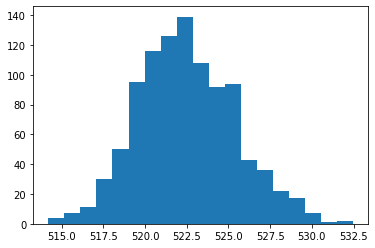

In [96]:
histogramme(1000, Delta)

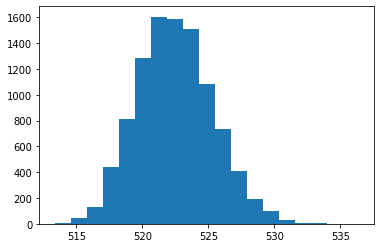

In [97]:
histogramme(10000, Delta)

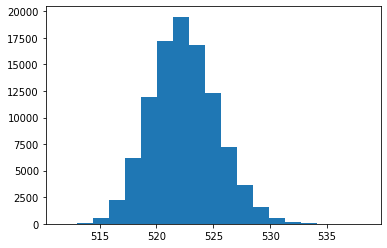

In [98]:
histogramme(100000, Delta)

L'allure de ces histogrammes se rapproche de plus en plus de celle d'une gaussienne, de plus en plus resserrée (la variance diminue), en accord avec le théorème central limite.

#### Intervalles de confiance

##### Méthode 1

In [61]:
intervalle_de_confiance1(1000, Delta)

[515.4656587870522, 528.133237357231]

In [62]:
intervalle_de_confiance1(10000, Delta)

[516.0771221820673, 528.7170040824689]

In [63]:
intervalle_de_confiance1(100000, Delta)

[514.9886065872147, 528.5028340206449]

On obtient des intervalles de oncfiance similaires, même en augmentant le nombre de simulations. 
On peut en déduire que 95% des valeurs sont comprises environ entre 515 mètres et 529 mètres.

##### Méthode 2

Ces résultats ne correspondent pas à la réalité. Nous n'avons malheureusement pas réussi à corriger le code.

In [76]:
intervalle_de_confiance_2(1000,f,0.00001)

[522.2689099343961, 522.6116985915686]

In [77]:
intervalle_de_confiance_2(10000,f,0.00001)

[522.3861046173456, 522.4945039086192]

In [78]:
intervalle_de_confiance_2(100000,f,0.00001)

[522.4231648301237, 522.457443695841]

#### Calcul de probabilité

Résultats probablement faux, toujours à cause de cette même erreur de code.

In [79]:
probabilité(g,1000)

1.6608936448392342e-13

In [80]:
probabilité(g,10000)

1.6608936448392342e-13

In [81]:
probabilité(g,100000)

1.6608936448392342e-13